# Single-cell multi-omics data for validation (mouse embryonic stem cells)

In this tutorial, we use mouse embryonic stem (ES) cells for validation of BurstLink inference procedure [[Larsson et al., 2019](https://www.nature.com/articles/s41586-018-0836-1), [Kamimoto et al., 2023](https://www.nature.com/articles/s41586-022-05688-9)].

In [1]:
# Importing packages
import os
import numpy as np
import pandas as pd
from IPython.display import Image, display
import burstlink as bl

In [ ]:
# Setting your work dictionary
os.chdir("your_path/realistic_data")

## Data preprocessing

### Preprocessing for scRNA-seq data

First, we perform basic preprocessing of scRNA-seq data, including filtering out, and data visualization [[Larsson et al., 2019](https://www.nature.com/articles/s41586-018-0836-1)].

You can download the processed data that were aligned and annotated in this link https://morris-lab.github.io/CellOracle.documentation/index.html:

In [ ]:
read_filename1 = os.path.abspath('primary_mouse_data/raw_data/SS3_c57_UMIs_mESC.csv')
read_filename2 = os.path.abspath('primary_mouse_data/raw_data/SS3_cast_UMIs_mESC.csv')
save_filename1 = 'countsdata_matrix_mESC.csv'
save_filename2 = 'stat_matrix_mESC.csv'
counts_matrix, stat_matrix = bl.pp._preprocessing.RNAseq_analysis(read_filename1, read_filename2, save_filename1, save_filename2, verbose = False)

### Preprocessing for scATAC-seq data

Next, we perform basic preprocessing of base GRN constructed from scATAC-seq data to narrow the scope of possible regulatory candidate genes in scRNA-seq data, including gene-pair interactions selection, filtered GRNs integration, and scRNA-seq data screening [[Kamimoto et al., 2023](https://www.nature.com/articles/s41586-022-05688-9)]. Note that the ES cells were derived from mice, and the first few steps for scATAC-seq data processing is the same as before.

### Integration of selected base-GRN and filtered scRNA-seq data

In [ ]:
grn_filename = os.path.abspath('primary_mouse_data/raw_data/genepair_grn.csv')
rnaseq_filename = os.path.abspath('primary_mouse_data/raw_data/stat_matrix_mESC.csv')
counts_filename = os.path.abspath('primary_mouse_data/raw_data/countsdata_matrix_mESC.csv')
threshold_value = 1
selected_genepair, selected_counts_matrix = bl.pp._preprocessing.selection_GRNandRNAseq(grn_filename, rnaseq_filename, counts_filename, threshold_value, verbose = False)

## Genome-wide inference procedure

### Inference function

In [ ]:
grn_filename =  os.path.abspath('primary_mouse_data/raw_data/selected_genepair.csv')
counts_filename = os.path.abspath('primary_mouse_data/raw_data/countsdata_matrix_mESC.csv')
save_filename = os.path.abspath('primary_mouse_data/inference_results/feedback_infer_results_mESC.csv')
infer_results = bl.tools._burst_interactions.global_burst_link(grn_filename, counts_filename, save_filename, verbose1 = False, verbose2 = False, verbose3 = 0, test = False, verbose4 = True)

### Inference results visualization

In [ ]:
read_filename = os.path.abspath('primary_mouse_data/inference_results/feedback_infer_results_mESC.csv')
counts_matrix = bl._utils._plotting.network_umap_pre(read_filename, os.path.abspath('primary_mouse_data/inference_results/network_data_umap_mESC.csv'))
gene_interactions = bl._utils._plotting.network_pre(read_filename, os.path.abspath('primary_mouse_data/inference_results/network_data_mESC.csv'))
burst_info = bl._utils._plotting.burst_pre(read_filename, os.path.abspath('primary_mouse_data/inference_results/burst_info_mESC.csv'))

In [ ]:
counts_file = os.path.abspath("primary_mouse_data/inference_results/network_data_umap_mESC.csv")
gene_interactions_file = os.path.abspath("primary_mouse_data/inference_results/network_data_mESC.csv")
burst_info_file = os.path.abspath("primary_mouse_data/inference_results/burst_info_mESC.csv")
degree_data_file = os.path.abspath("primary_mouse_data/inference_results/degree_data_mESC.csv")
network_figure = os.path.abspath("primary_mouse_data/inference_results/network_plot_mESC.png") 
bl.plotting._plotting.network_visualization(counts_file, gene_interactions_file, burst_info_file, degree_data_file, network_figure, 2, 0.5)

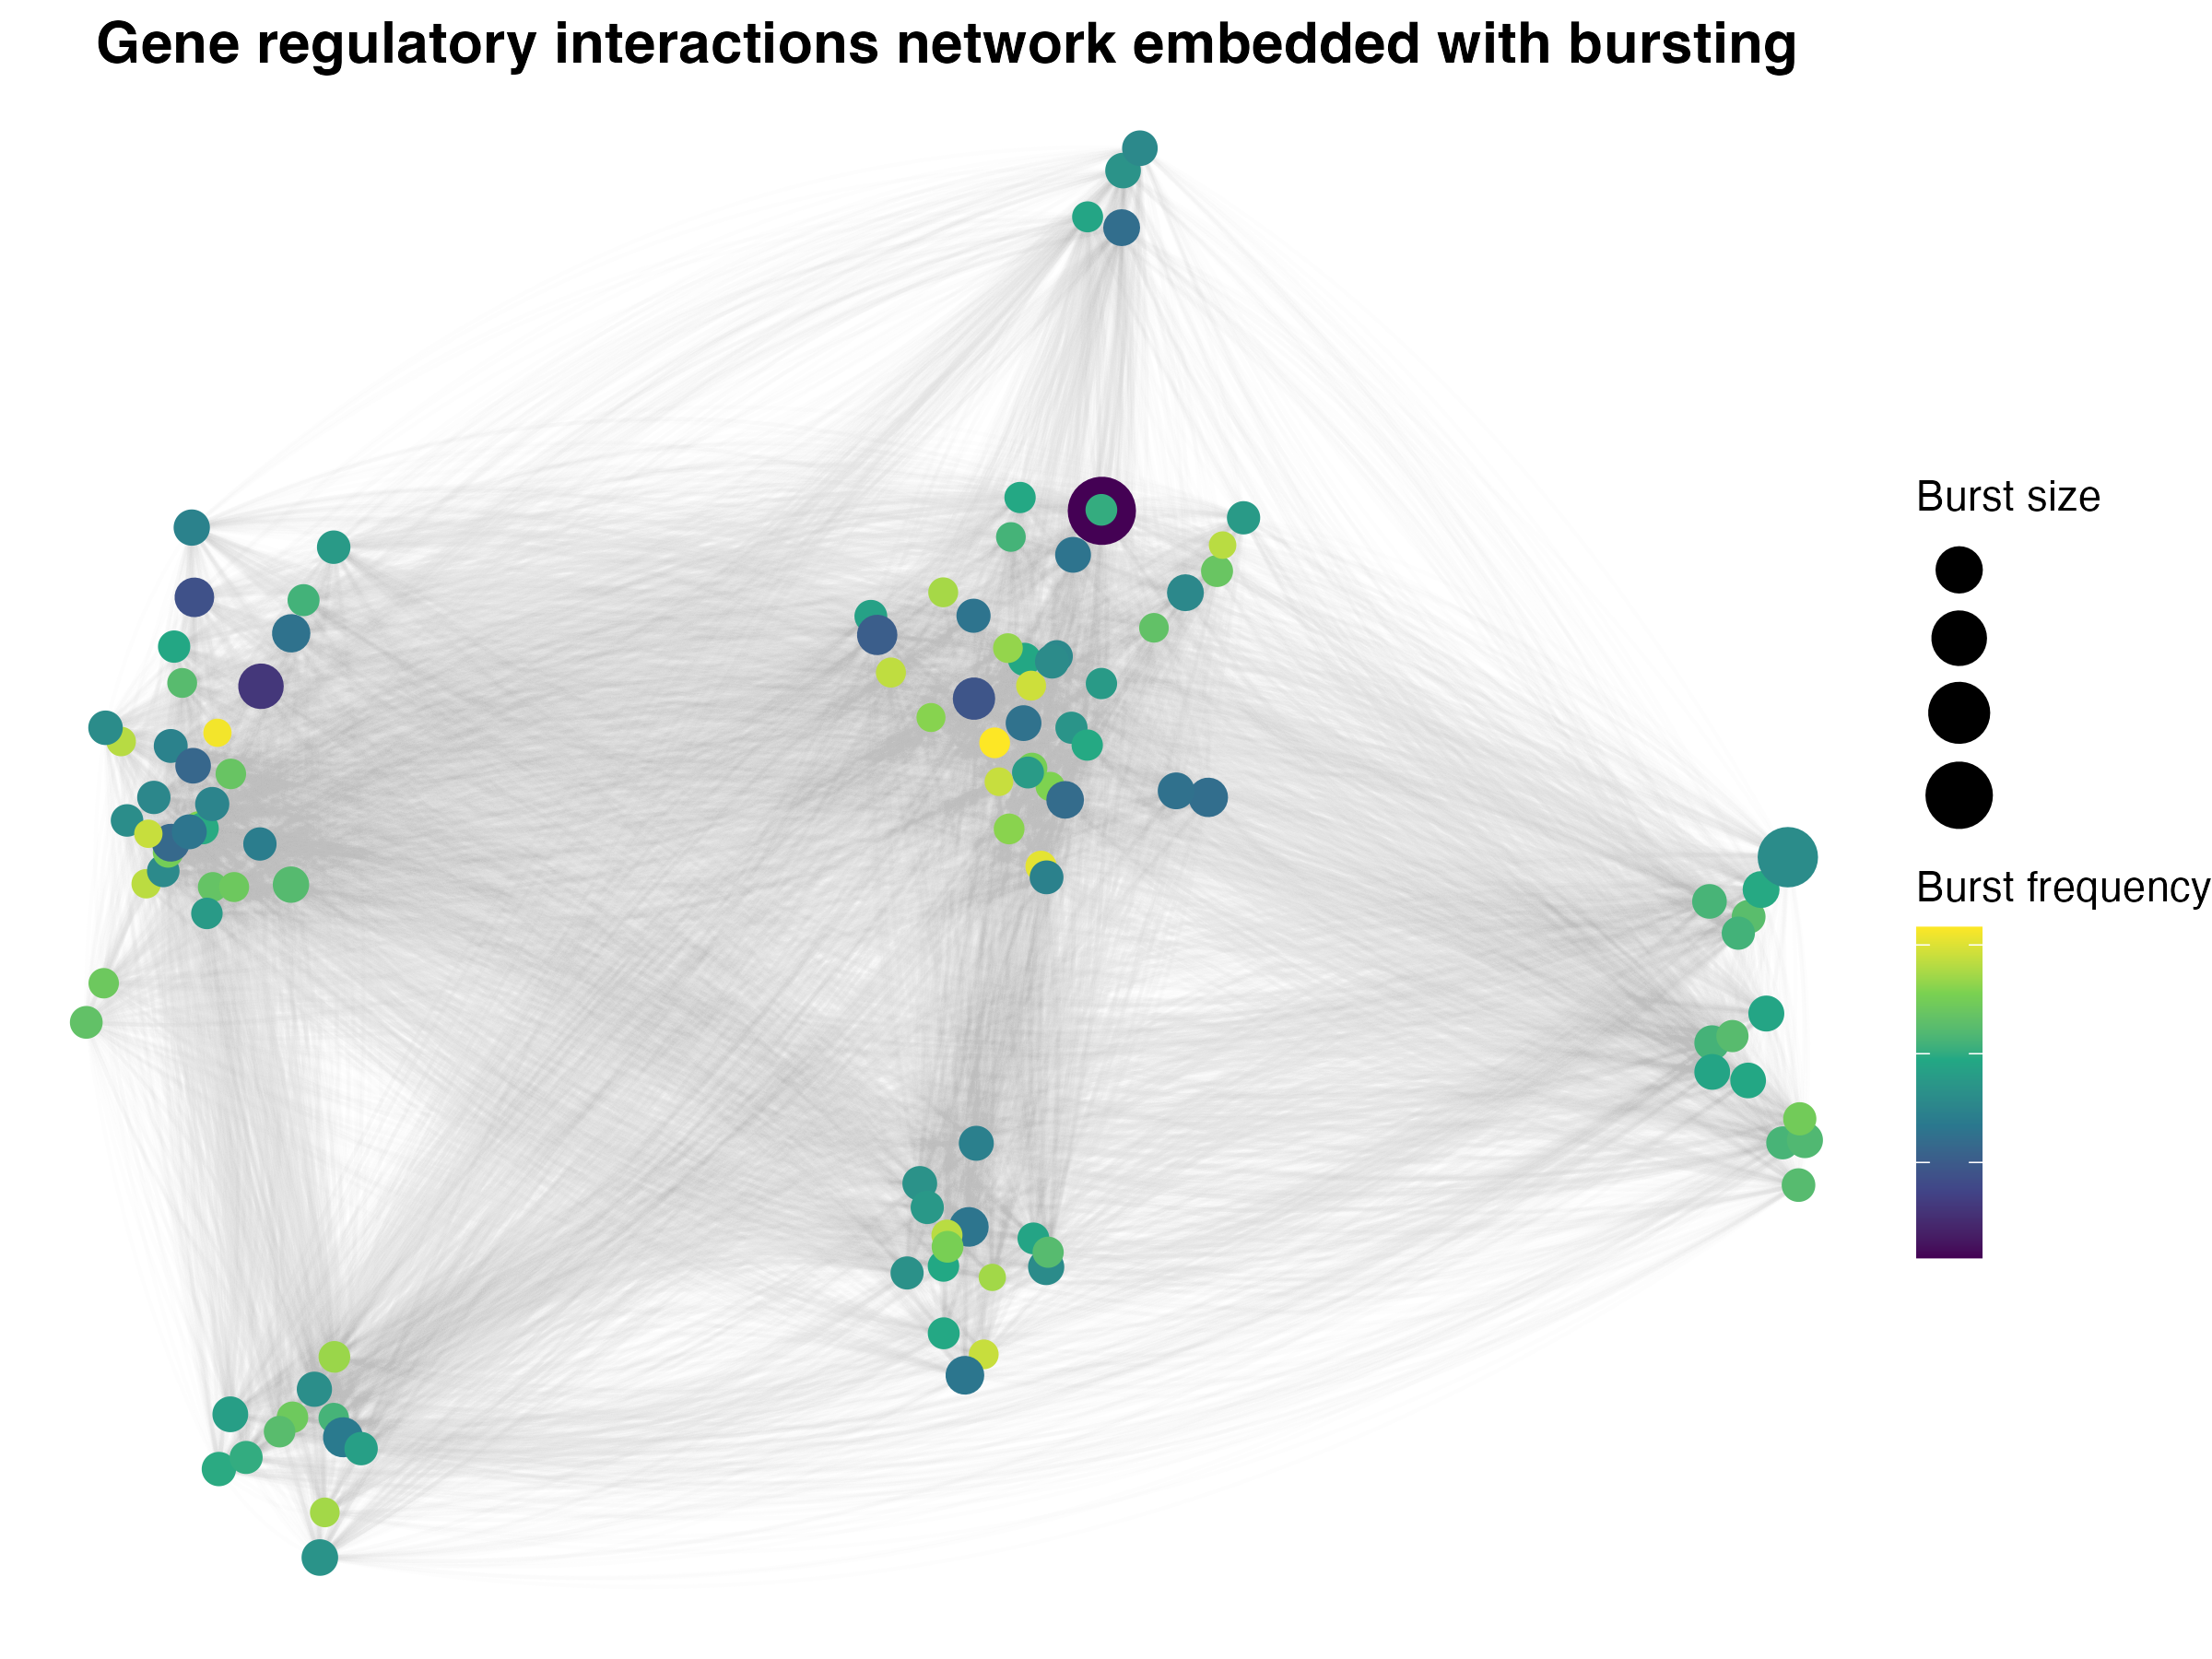

In [ ]:
display(Image(filename=os.path.abspath("primary_mouse_data/inference_results/network_plot_mESC.png"), width=600))

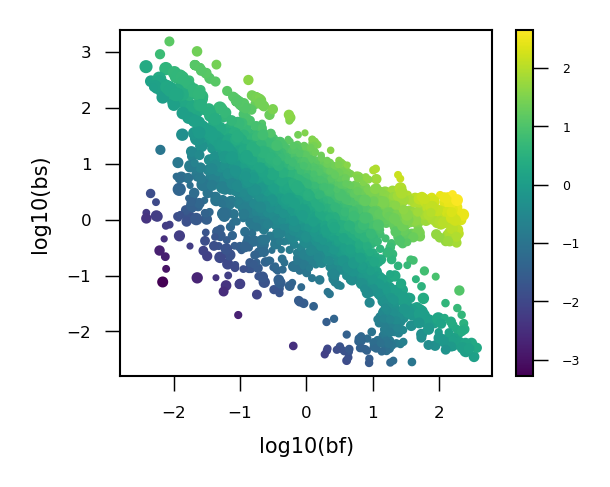

In [9]:
readfile_name = os.path.abspath('primary_mouse_data/inference_results/feedback_infer_results_mESC.csv')
bl.plotting.scatterplot_burst(readfile_name, [-2.5, 2.8, -2.6, 3.2], False, [-2.8, 2.8], [-2.8, 3.4])

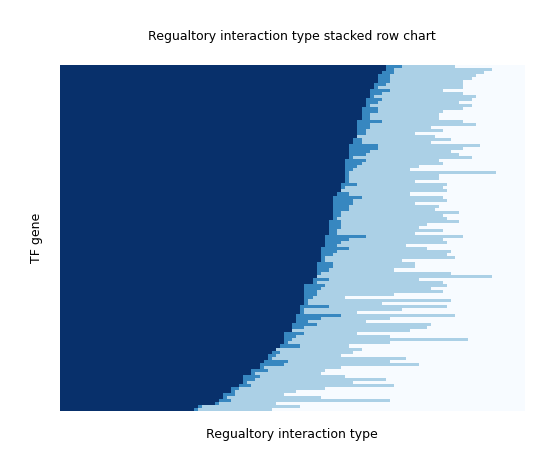

In [3]:
readfile_name = os.path.abspath('primary_mouse_data/inference_results/feedback_infer_results_mESC.csv')
bl.plotting.TFs_interactiontype_network(readfile_name)

## Downstream analysis

### Burst manners correlation between cell types

We investigated whether the burst manners of the two cell types groups are correlated.

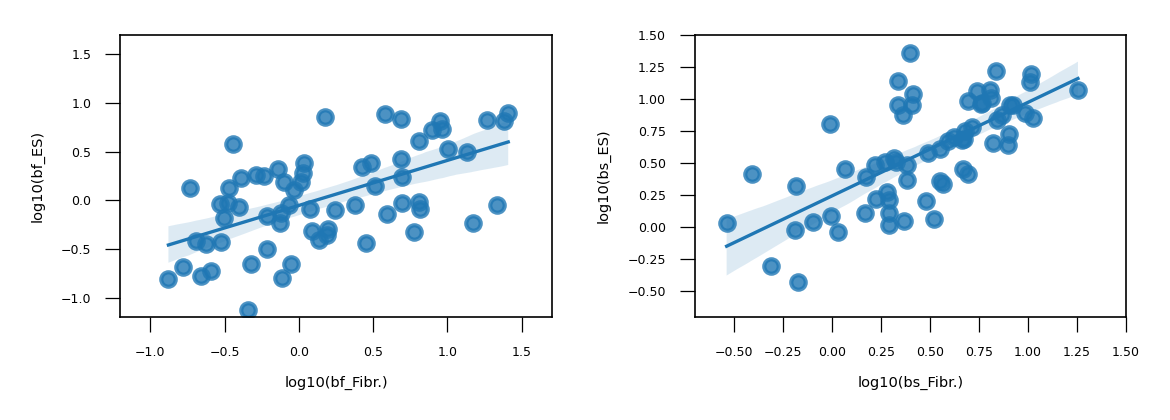

(5.131835100447408e-07, 1.744899777162537e-10)

In [3]:
inference_result_Fibr_ = os.path.abspath('primary_mouse_data/inference_results/feedback_infer_results.csv')
inference_result_ESC_ = os.path.abspath('primary_mouse_data/inference_results/feedback_infer_results_mESC.csv')
bl.tools._downstream_analysis.correlation_burst(inference_result_Fibr_, inference_result_ESC_)